#### Exercises
Do your work for this exercise in a jupyter notebook named hypothesis_testing.ipynb.

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

1. Has the network latency gone up since we switched internet service providers?
2. Is the website redesign any good?
3. Is our television ad driving more sales?

###### 1. Has the network latency gone up since we switched internet service providers?
         Rewording:  Is the current network latency greater than the previous network latency?

     -Null Hypothesis:  The current isp latency is <= to the previous isp latency.
     -Alternative Hypothesis:  The current isp latency is > than the previous isp latency.
    
     -True positive: the current isp latency is <= the previous isp latency, with a p < .05.
     -True negative: the current isp latency is <= the previous isp latency with a p > .05.
     -Type I error: We reject the null hypothesis as false, because the p value is < .05, but in reality, there is no difference or increase in latency. 
     -Type II error:  We accept the null hypothesis as true because the p value is > than .05, but in reality, the null hypothesis is true.

###### 2. Is the website redesign any good?
         Rewording: Has the daily_conversion_rate increased since the website redesign? 

     -Null Hypothesis: daily_conversion_rate after_redesign is <= the daily_conversion_rate pre_redesign
     -Alternative Hypothesis:  daily_conversion_rate after_redesign is > the daily_conversion_rate pre_redesign
    
     -True positive: The daily_conversion_rate after_redesign is <= the daily_conversion_rate pre_redesign, with a p < .05.
     -True negative: The daily_conversion_rate after_redesign is <= the daily_conversion_rate pre_redesign with a p > .05.
     -Type I error: We reject the null hypothesis as false, because the p value is < .05, but in reality, there is no difference or increase in the daily_conversion_rate. 
     -Type II error:  We accept the null hypothesis as true because the p value is > than .05, but in reality, the null hypothesis is true.

###### 3. Is our television ad driving more sales?
         Rewording:  (If the tv ad has a specific discount code):  Are the amount of sales using the tv_code more than sales using other not_tv_codes?

     -Null Hypothesis: The amount of sales using the tv_code <= than other not_tv_codes 
     -Alternative Hypothesis:  The amount of sales using the tv_code > than other not_tv_codes
    
     -True positive: The amount of sales with the tv_code is > sales with other not_tv_codes, with a p < .05.
     -True negative: The amount of sales with the tv_code is <= sales with other not_tv_codes, with a p > .05.
     -Type I error: We reject the null hypothesis as false, because the p value is < .05, but in reality, there is no difference in sales using the tv_code. 
     -Type II error:  We accept the null hypothesis as true because the p value is > than .05, but in reality, the null hypothesis is true.

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

import numpy as np
import pandas as pd
from pydataset import data

###### Exercises for T Testing

###### 1. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

###### 2. Load the mpg dataset and use it to answer the following questions:

###### a. Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
###### b. Are compact cars more fuel-efficient than the average car?
###### c. Do manual cars get better gas mileage than automatic cars?

In [5]:
# #1.
# office 1 sample sales: 40 sales, mean:90 days, std:15 days
# office 2 samples sales: 50 sales, mean: 100 days, std: 20 days.
#set alpha to .05

#is the mean sales of office 1 different than the mean sales of office 2?





Null Hypothesis | $H_{0}$: There is no difference in the mean sales of Office 1 when compared to the mean sales of Office 2.

Alternative Hyphothesis | $H_{a}$: There is a difference in the mean sales of Office 1 when compared to the mean sales of Office 2.

In [60]:
# using a simulation, i can create random numbers for office 1 and office 2

office_1 = np.random.normal(loc = 90, scale = 15, size = (40))
office_2 = np.random.normal(loc = 100, scale = 20, size = (50))



In [61]:
df_1 = pd.DataFrame(office_1)
df_2 = pd.DataFrame(office_2)

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

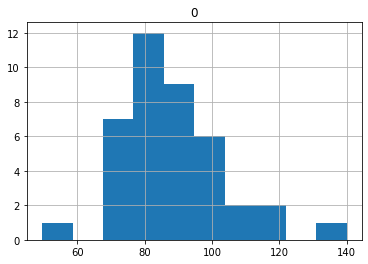

In [62]:
df_1.hist()

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

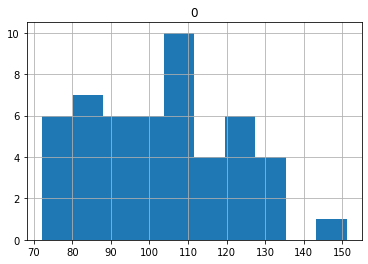

In [63]:
df_2.hist()

In [64]:
#verifying that the arrays are normally(ish) distributed. Of course they are since we using np.random.normal.  
#but, just plotting for habit's sake, bc if numbers are not randomized from np, then I'd def want to plot to check

In [65]:
#set alpha to .05

alpha = .05

In [66]:
#comparing the means to each other independently.  so we'll use the independent t-test, two tailed

#scipy.stats.ttest_ind

#first check the variance:

print(office_1.var())
print(office_2.var())

258.8752651855405
337.626311864651


In [67]:
#variances are not equal, so we'll set the equal_var to false.
#run the scipy.stats.ttest_ind test

t, p = stats.ttest_ind(office_1, office_2, equal_var=False)

t, p

(-3.9137015352470694, 0.00017976565567945845)

In [70]:
print("Reject $H_{0}$? ", p < alpha)

Reject $H_{0}$?  True


In [73]:
df = data('mpg')

In [74]:
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


###### a. Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
###### b. Are compact cars more fuel-efficient than the average car?
###### c. Do manual cars get better gas mileage than automatic cars?

In [81]:
df[df.year == 2008].cty.head()

3     20
4     21
7     18
10    20
11    19
Name: cty, dtype: int64

In [82]:
df["avg_mpg"] = (df.cty + df.hwy) / 2

In [83]:
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [87]:
mpg_2008 = df[df.year == 2008].avg_mpg

mpg_2008.head()
#creating a series that shows the average mpg for all cars made in 2008

3     25.5
4     25.5
7     22.5
10    24.0
11    23.0
Name: avg_mpg, dtype: float64

<AxesSubplot:>

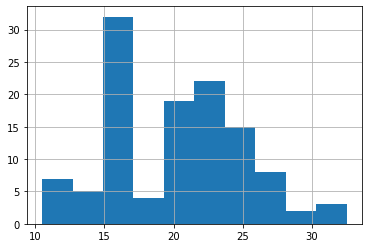

In [86]:
mpg_2008.hist()

In [88]:
mpg_1999 = df[df.year == 1999].avg_mpg

mpg_1999.head()
#creating a series that shows the average mpg for all cars made in 1999.

1    23.5
2    25.0
5    21.0
6    22.0
8    22.0
Name: avg_mpg, dtype: float64

<AxesSubplot:>

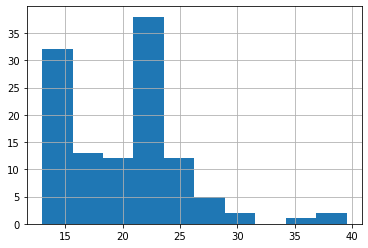

In [89]:
mpg_1999.hist()

In [90]:
#both plots have a normal-ish shape.  
#now, set alpha to .05

alpha = .05

###### Null Hypothesis | $H_{0}$: The mean mpg_2008 is equal to the mean mpg_1999.

###### Alternative Hyphothesis | $H_{a}$: The mean mpg_2008 is NOT equal to the mean mpg_1999.

In [91]:
#now i want to check the variances

print(mpg_2008.var())
print(mpg_1999.var())

24.097480106100797
27.122605363984682


In [94]:
#they are slightly different, so i will set equal_var = False
#there are two independent variables, and we are checking for a difference

t, p = stats.ttest_ind(mpg_2008, mpg_1999, equal_var = False)
t, p

(-0.21960177245940962, 0.8263750772060638)

In [95]:
print("Reject $H_{0}$? ", p < alpha)

Reject $H_{0}$?  False
